## Eryk's Notebook for Module 1 Project

Please fill out:
* Student name:  **Eryk Wdowiak**
* Student pace:  full-time
* Scheduled project review date/time:  12th of Never at 13 o'clock
* Instructor name:  Fangfang Lee
* Blog post URL:  https://www.wdowiak.me/gotta-blog?answer=Yes


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##  data files
!ls zippedData/

bom.movie_gross.csv.gz	  imdb.title.crew.csv.gz	rt.reviews.tsv.gz
imdb.name.basics.csv.gz   imdb.title.principals.csv.gz	tmdb.movies.csv.gz
imdb.title.akas.csv.gz	  imdb.title.ratings.csv.gz	tn.movie_budgets.csv.gz
imdb.title.basics.csv.gz  rt.movie_info.tsv.gz


In [3]:
#bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz',compression='gzip')
#bom_movie_gross.head()
#list(bom_movie_gross.columns)

In [4]:
#imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz',compression='gzip')
#imdb_name_basics.head()
#list(imdb_name_basics.columns)

In [5]:
#imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz',compression='gzip')
#print(imdb_title_akas.shape)
#imdb_title_akas.head()
#list(imdb_title_akas.columns)

In [6]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz',compression='gzip')
print(imdb_title_basics.shape)
imdb_title_basics.head()
#list(imdb_title_basics)

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
#imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz',compression='gzip')
#imdb_title_crew.head()
#list(imdb_title_crew.columns)

In [8]:
#imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz',compression='gzip')
#imdb_title_principals.head()
#list(imdb_title_principals.columns)

In [9]:
#imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz',compression='gzip')
#imdb_title_ratings.head()
#list(imdb_title_ratings.columns)

In [10]:
#rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',compression='gzip',sep='\t')
#rt_movie_info.head()
#list(rt_movie_info.columns)

In [11]:
#rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',compression='gzip',sep='\t',encoding='unicode_escape')
#rt_reviews.head()
#list(rt_reviews.columns)

In [12]:
#tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz',compression='gzip')
#tmdb_movies.head()
#list(tmdb_movies.columns)

In [13]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip')
#print(tn_movie_budgets.shape)
#tn_movie_budgets.head()
#list(tn_movie_budgets.columns)

In [14]:
##  define some conversion functions

##  string of dollars to float
def dollars_to_float(inlist):
    return list(map(lambda x: float(x.replace("$","").replace(",","")), inlist))

##  date string to integer year
def date_to_yrint(datestr):
    return list(map(lambda x: int(x.split()[-1]), datestr))

In [15]:
##  convert strings to float
tn_movie_budgets['production_budget'] = dollars_to_float(tn_movie_budgets['production_budget'])
tn_movie_budgets['domestic_gross'] = dollars_to_float(tn_movie_budgets['domestic_gross'])
tn_movie_budgets['worldwide_gross'] = dollars_to_float(tn_movie_budgets['worldwide_gross'])

##  divide by one million
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'] / 1000000
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'] / 1000000
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'] / 1000000

##  calculate profit
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

##  convert release year to integer
tn_movie_budgets['release_year'] = date_to_yrint(tn_movie_budgets['release_date'])

##  print some information
#tn_movie_budgets.info()

In [16]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_year
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,2351.345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-200.237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,1072.413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,999.721747,2017


In [17]:
tn_movie_budgets.shape

(5782, 8)

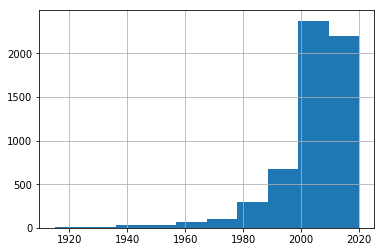

In [18]:
tn_movie_budgets.release_year.hist();

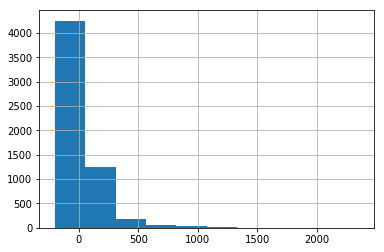

In [19]:
tn_movie_budgets.profit.hist();

In [20]:
##  create new dataframe for statistical analysis

##  first set the indices to the movie's title
imdb_title_basics.set_index('primary_title',inplace=True)
tn_movie_budgets.set_index('movie',inplace=True)

##  now create the new dataframe
movie_df = tn_movie_budgets.join(imdb_title_basics,how='inner')

In [21]:
#imdb_title_basics.head()
#tn_movie_budgets.head()
movie_df.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,release_year,tconst,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015",1.5,0.000000,0.000000,-1.500000,2015,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,"Mar 11, 2016",5.0,72.082999,108.286422,103.286422,2016,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",12.0,0.014616,0.014616,-11.985384,2015,tt3453052,10 Days in a Madhouse,2015,111.0,Drama
12 Rounds,37,"Mar 27, 2009",20.0,12.234694,17.306648,-2.693352,2009,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance"
12 Strong,64,"Jan 19, 2018",35.0,45.819713,71.118378,36.118378,2018,tt1413492,12 Strong,2018,130.0,"Action,Drama,History"


In [22]:
#imdb_title_basics.shape
#tn_movie_budgets.shape
movie_df.shape

(3815, 12)